Tester le modèle sur le dataset du MNIST sans attaque pour pouvoir comparer les performances avec attaque

In [2]:
%%capture
import copy
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from PIL import Image
import tensorflow.keras.backend as K
from tensorflow.keras import datasets, optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Activation

2025-12-02 14:41:03.070108: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-12-02 14:41:03.070174: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-12-02 14:41:03.071772: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-12-02 14:41:03.082374: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
def load_data():
    (_, _), (test_data, test_labels) = datasets.mnist.load_data()

    test_data = test_data / 255.0
    test_data = test_data[..., tf.newaxis]
    test_data = tf.cast(test_data, tf.float32)

    test_labels = tf.one_hot(test_labels, 10)
    return test_data, test_labels

In [4]:
model_logit = tf.keras.models.load_model('/work/mnist_classifier_model-no-softmax.h5')
xb, yb = load_data()

2025-12-02 14:41:11.877436: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:274] failed call to cuInit: UNKNOWN ERROR (34)
2025-12-02 14:41:13.476694: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 62720000 exceeds 10% of free system memory.


In [5]:
x_batch = np.array([xb[10], xb[2], xb[1], xb[32], xb[4], xb[15], xb[21], xb[0], xb[61], xb[9]])
y_batch = np.array([yb[10], yb[2], yb[1], yb[32], yb[4], yb[15], yb[21], yb[0], yb[61], yb[9]])

In [6]:
print(x_batch.shape)
print(x_batch[0].shape)


(10, 28, 28, 1)
(28, 28, 1)


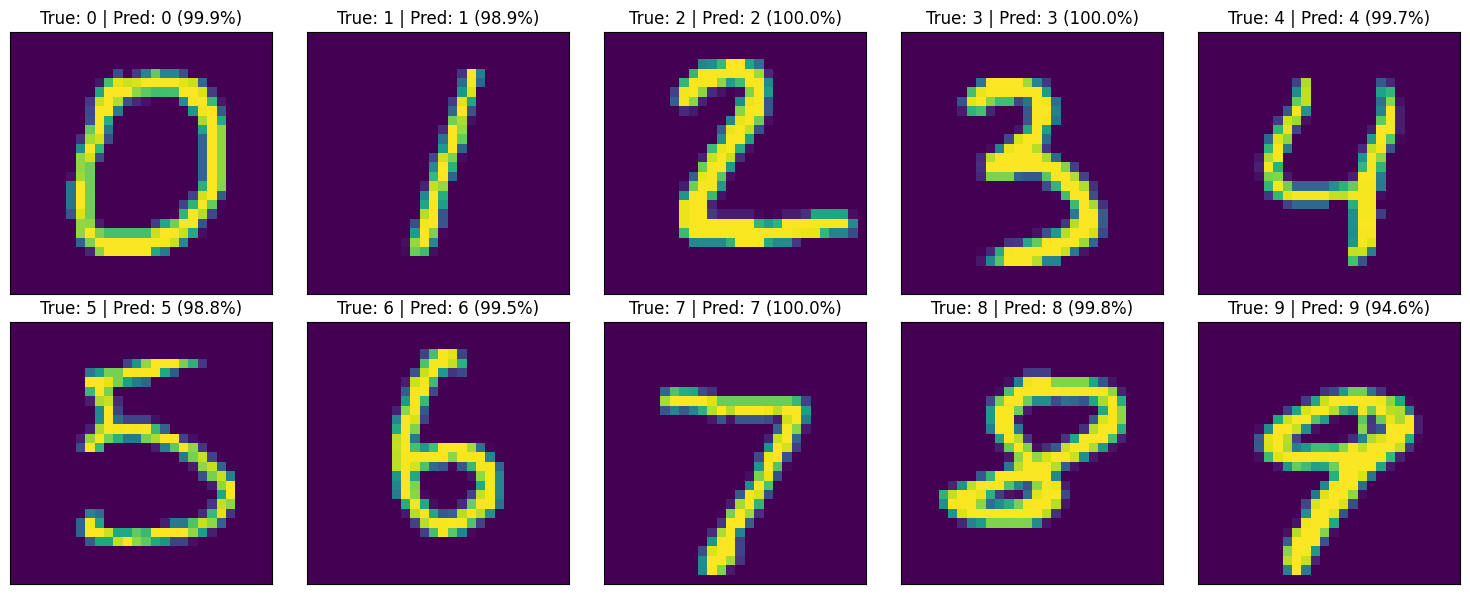

In [7]:
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.flatten()

for i in range(10):

    image = x_batch[i]
    
    pert_pred = model_logit.predict(image[np.newaxis, ...], verbose=0)
    pert_pred_softmax = tf.nn.softmax(pert_pred).numpy()

    axes[i].imshow(image.reshape(28,28))
    axes[i].set_xticks([])
    axes[i].set_yticks([])
    axes[i].set_title(f'True: {np.argmax(y_batch[i])} | Pred: {np.argmax(pert_pred_softmax)} ({pert_pred_softmax[0, np.argmax(pert_pred_softmax)]*100:.1f}%)')

plt.tight_layout()
plt.show()